In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

In [83]:
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

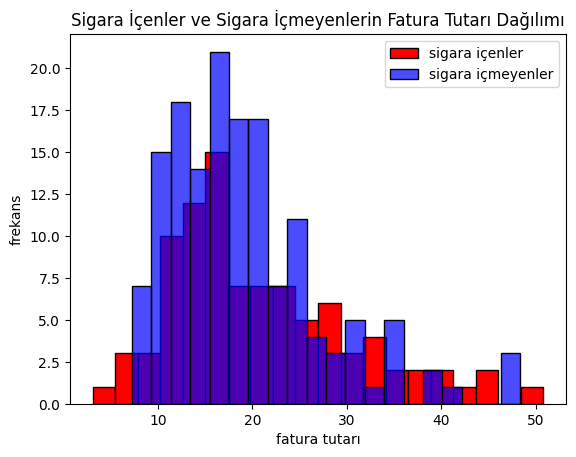

In [22]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.
smoker_yes=tips.loc[tips["smoker"]=="Yes", "total_bill"]
smoker_no=tips.loc[tips["smoker"]=="No", "total_bill"]

sns.histplot(smoker_yes,bins=20,color="red",alpha=1,label="sigara içenler")
sns.histplot(smoker_no,bins=20,color="blue",alpha=0.7,label="sigara içmeyenler")

plt.xlabel("fatura tutarı")
plt.ylabel("frekans")
plt.title("Sigara İçenler ve Sigara İçmeyenlerin Fatura Tutarı Dağılımı")
plt.legend()
plt.show()


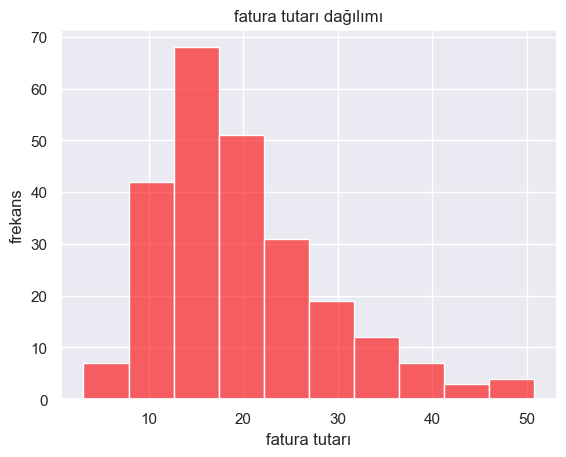

In [86]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.
total=tips["total_bill"]
sns.histplot(data=total,bins=10,color="red",alpha=0.6)
plt.xlabel("fatura tutarı")
plt.ylabel("frekans")
plt.title("fatura tutarı dağılımı")
plt.show()

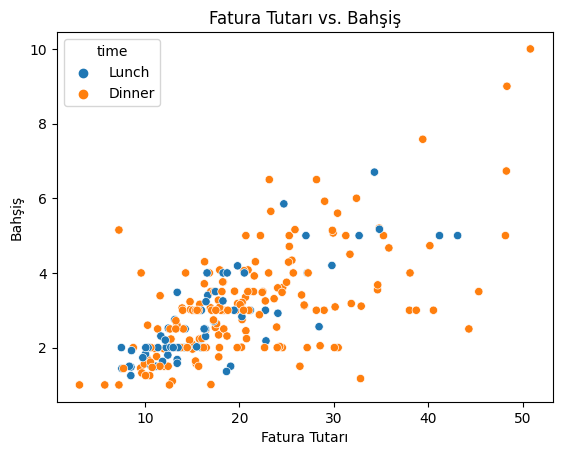

In [27]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

sns.scatterplot(data=tips,x="total_bill",y="tip",hue="time")
plt.xlabel("Fatura Tutarı")
plt.ylabel("Bahşiş")
plt.title("Fatura Tutarı vs. Bahşiş")
plt.show()


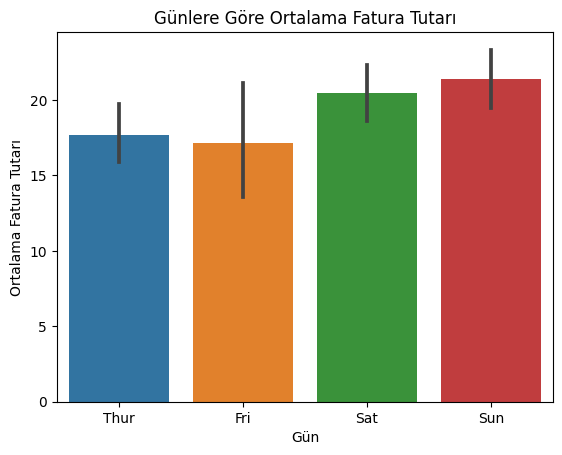

In [32]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

sns.barplot(data=tips,x="day",y="total_bill")
plt.xlabel("Gün")
plt.ylabel("Ortalama Fatura Tutarı")
plt.title("Günlere Göre Ortalama Fatura Tutarı")
plt.show()

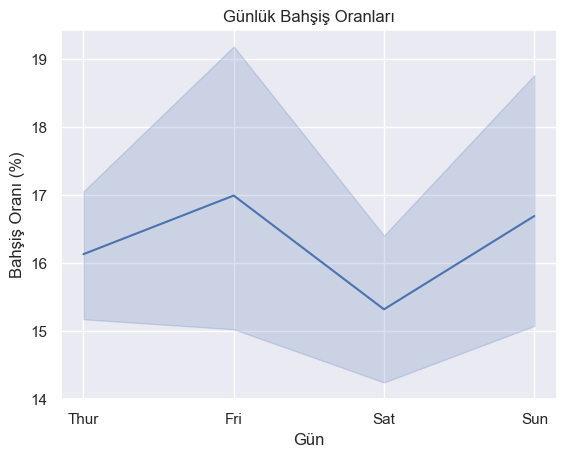

In [39]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.


## bahşiş oranı hesabı:
tips["tip_percentage"] = (tips["tip"] / tips["total_bill"]) * 100
sns.set(style="darkgrid")
sns.lineplot(data=tips,x="day",y="tip_percentage")
plt.xlabel("Gün")
plt.ylabel("Bahşiş Oranı (%)")
plt.title("Günlük Bahşiş Oranları")
plt.show()

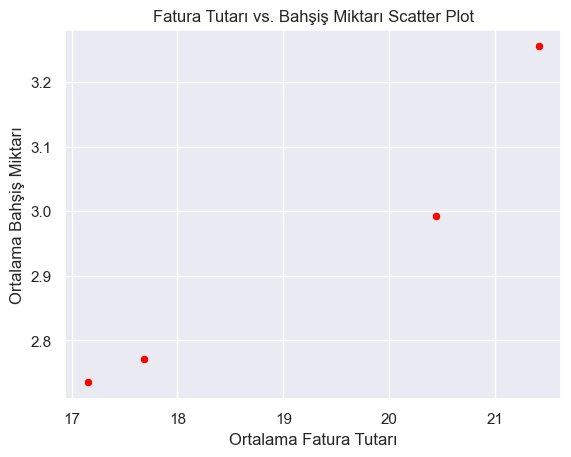

In [43]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.
total_bill_percentage=tips.groupby("day")["total_bill"].mean()
total_tip_percentage=tips.groupby("day")["tip"].mean()
sns.scatterplot(data=tips,x=total_bill_percentage,y=total_tip_percentage,color="red")
plt.xlabel("Ortalama Fatura Tutarı")
plt.ylabel("Ortalama Bahşiş Miktarı")
plt.title("Fatura Tutarı vs. Bahşiş Miktarı Scatter Plot")
plt.show()

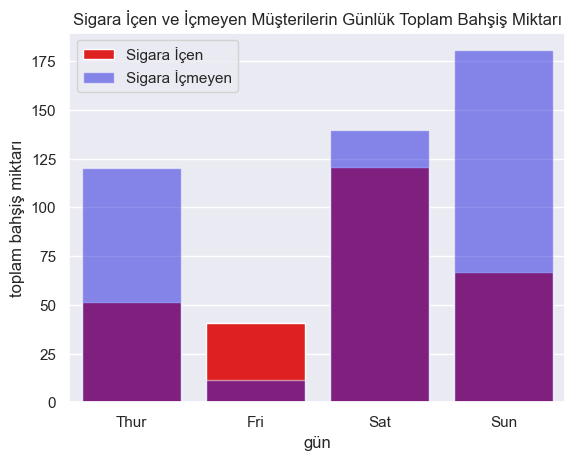

In [71]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.
smoker_yes=tips.loc[tips["smoker"]=="Yes"].groupby("day")["tip"].sum()
smoker_no=tips.loc[tips["smoker"]=="No"].groupby("day")["tip"].sum()
sns.barplot(x=smoker_yes.index,y=smoker_yes.values,color="red",label="Sigara İçen")
sns.barplot(x=smoker_no.index, y=smoker_no.values, color="blue", label="Sigara İçmeyen", alpha=0.5)
plt.xlabel("gün")
plt.ylabel("toplam bahşiş miktarı")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Günlük Toplam Bahşiş Miktarı")
plt.legend()
plt.show()

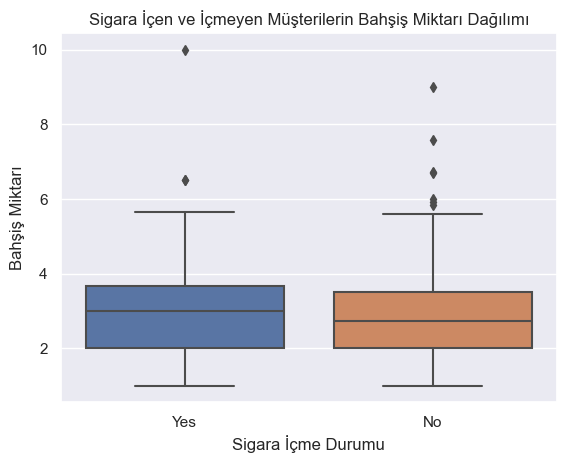

(<Axes: title={'center': 'Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarı Dağılımı'}, xlabel='Sigara İçme Durumu', ylabel='Bahşiş Miktarı'>,
 Text(0.5, 27.859375, 'Sigara İçme Durumu'),
 Text(25.078125, 0.5, 'Bahşiş Miktarı'),
 Text(0.5, 1.0, 'Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarı Dağılımı'),
 None)

In [76]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.


sns.boxplot(x="smoker",y="tip",data=tips)
plt.xlabel("Sigara İçme Durumu")
plt.ylabel("Bahşiş Miktarı")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarı Dağılımı")
plt.show()



Text(0.5, 1.0, 'Sigara İçenler ve Sigara İçmeyenlerin Fatura Tutarı Dağılımı')

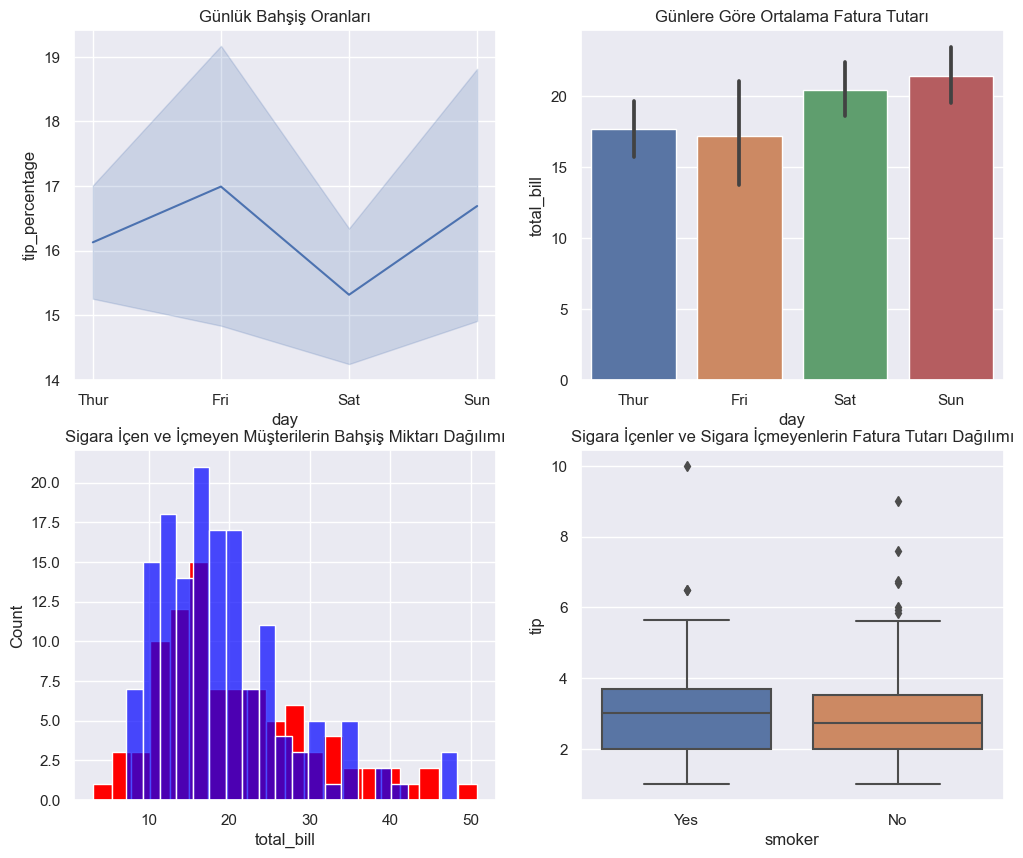

In [97]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
tips["tip_percentage"] = (tips["tip"] / tips["total_bill"]) * 100
sns.lineplot(data=tips,x="day",y="tip_percentage")
plt.title("Günlük Bahşiş Oranları")

plt.subplot(2, 2, 2)
sns.barplot(data=tips,x="day",y="total_bill")
plt.title("Günlere Göre Ortalama Fatura Tutarı")

plt.subplot(2, 2, 3)
sns.histplot(smoker_yes,bins=20,color="red",alpha=1,label="sigara içenler")
sns.histplot(smoker_no,bins=20,color="blue",alpha=0.7,label="sigara içmeyenler")
plt.title("Sigara İçen ve İçmeyen Müşterilerin Bahşiş Miktarı Dağılımı")


plt.subplot(2, 2, 4)
sns.boxplot(x="smoker",y="tip",data=tips)
plt.title("Sigara İçenler ve Sigara İçmeyenlerin Fatura Tutarı Dağılımı")